# Data Visualization

# Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)
from sklearn.inspection import permutation_importance

## EDA

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"
df = pd.read_excel(url,sheet_name='student-por')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12


In [4]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)

,Column,dtype,# null,null (%),nunique,min,max
0,school,object,0,0.0,2,GP,MS
1,sex,object,0,0.0,2,F,M
2,age,int64,0,0.0,8,15,22
3,address,object,0,0.0,2,R,U
4,famsize,object,0,0.0,2,GT3,LE3
5,Pstatus,object,0,0.0,2,A,T
6,Medu,int64,0,0.0,5,0,4
7,Fedu,int64,0,0.0,5,0,4
8,Mjob,object,0,0.0,5,at_home,teacher
9,Fjob,object,0,0.0,5,at_home,teacher


In [5]:
## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

Text(0.5, 1.0, 'Distribution of Final Grades')

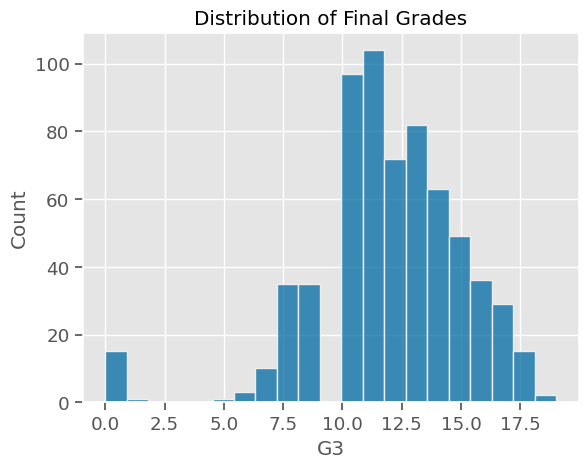

In [6]:
ax = sns.histplot(data=df,x='G3');
ax.set_title("Distribution of Final Grades")

In [7]:
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


# Data Preprocessing

In [8]:
y = df['G3'].copy()
X = df.drop(columns = ['G3'], axis =1).copy()

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state= SEED)
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
54,GP,F,15,U,LE3,A,3,3,other,other,other,mother,1,1,0,no,no,no,no,yes,yes,yes,no,5,3,4,4,4,1,0,13,12
208,GP,M,16,U,GT3,T,2,3,other,other,home,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,3,3,1,1,3,0,13,12
23,GP,M,16,U,LE3,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,2,4,5,2,10,10
547,MS,M,16,R,LE3,T,4,1,other,at_home,other,father,1,1,0,no,no,no,no,yes,yes,yes,no,4,1,2,2,1,2,0,10,11
604,MS,F,18,U,GT3,T,1,1,at_home,services,course,mother,3,2,1,no,no,no,no,yes,no,no,no,4,4,2,1,2,2,2,9,10


In [9]:
## make categorical selector and verify it works 
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [10]:
## make numeric selector and verify it works 
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

In [11]:
#column transformers
cat_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')
num_imputer = SimpleImputer(strategy='mean')
ohe=OneHotEncoder(handle_unknown='ignore', sparse='unknown')

## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(cat_imputer,ohe)

In [15]:
#instantiate preprocessor
preprocessor = make_column_transformer((cat_pipe, cat_sel), (num_imputer, num_sel), remainder= 'drop')
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse='unknown'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000267DBCE2AC0>),
                                ('simpleimputer', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000267DBCE2760>)])

In [16]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['pipeline__school_GP', 'pipeline__school_MS', 'pipeline__sex_F',
       'pipeline__sex_M', 'pipeline__address_R', 'pipeline__address_U',
       'pipeline__famsize_GT3', 'pipeline__famsize_LE3',
       'pipeline__Pstatus_A', 'pipeline__Pstatus_T',
       'pipeline__Mjob_at_home', 'pipeline__Mjob_health',
       'pipeline__Mjob_other', 'pipeline__Mjob_services',
       'pipeline__Mjob_teacher', 'pipeline__Fjob_at_home',
       'pipeline__Fjob_health', 'pipeline__Fjob_other',
       'pipeline__Fjob_services', 'pipeline__Fjob_teacher',
       'pipeline__reason_course', 'pipeline__reason_home',
       'pipeline__reason_other', 'pipeline__reason_reputation',
       'pipeline__guardian_father', 'pipeline__guardian_mother',
       'pipeline__guardian_other', 'pipeline__schoolsup_no',
       'pipeline__schoolsup_yes', 'pipeline__famsup_no',
       'pipeline__famsup_yes', 'pipeline__paid_no', 'pipeline__paid_yes',
       'pipeline__activities_no', 'pipeline__activities_yes',
       'pipel

In [18]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train), columns = feature_names,
                         index = X_train.index)
X_train_df.head()

,pipeline__school_GP,pipeline__school_MS,pipeline__sex_F,pipeline__sex_M,pipeline__address_R,pipeline__address_U,pipeline__famsize_GT3,pipeline__famsize_LE3,pipeline__Pstatus_A,pipeline__Pstatus_T,pipeline__Mjob_at_home,pipeline__Mjob_health,pipeline__Mjob_other,pipeline__Mjob_services,pipeline__Mjob_teacher,pipeline__Fjob_at_home,pipeline__Fjob_health,pipeline__Fjob_other,pipeline__Fjob_services,pipeline__Fjob_teacher,pipeline__reason_course,pipeline__reason_home,pipeline__reason_other,pipeline__reason_reputation,pipeline__guardian_father,...,pipeline__activities_no,pipeline__activities_yes,pipeline__nursery_no,pipeline__nursery_yes,pipeline__higher_no,pipeline__higher_yes,pipeline__internet_no,pipeline__internet_yes,pipeline__romantic_no,pipeline__romantic_yes,simpleimputer__age,simpleimputer__Medu,simpleimputer__Fedu,simpleimputer__traveltime,simpleimputer__studytime,simpleimputer__failures,simpleimputer__famrel,simpleimputer__freetime,simpleimputer__goout,simpleimputer__Dalc,simpleimputer__Walc,simpleimputer__health,simpleimputer__absences,simpleimputer__G1,simpleimputer__G2
54,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,3.0,3.0,1.0,1.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,0.0,13.0,12.0
208,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,3.0,2.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,0.0,13.0,12.0
23,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,2.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,4.0,5.0,2.0,10.0,10.0
547,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,4.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,1.0,2.0,0.0,10.0,11.0
604,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,18.0,1.0,1.0,3.0,2.0,1.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,9.0,10.0


In [19]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns= feature_names,
                        index = X_test.index)
X_test_df.head()

,pipeline__school_GP,pipeline__school_MS,pipeline__sex_F,pipeline__sex_M,pipeline__address_R,pipeline__address_U,pipeline__famsize_GT3,pipeline__famsize_LE3,pipeline__Pstatus_A,pipeline__Pstatus_T,pipeline__Mjob_at_home,pipeline__Mjob_health,pipeline__Mjob_other,pipeline__Mjob_services,pipeline__Mjob_teacher,pipeline__Fjob_at_home,pipeline__Fjob_health,pipeline__Fjob_other,pipeline__Fjob_services,pipeline__Fjob_teacher,pipeline__reason_course,pipeline__reason_home,pipeline__reason_other,pipeline__reason_reputation,pipeline__guardian_father,...,pipeline__activities_no,pipeline__activities_yes,pipeline__nursery_no,pipeline__nursery_yes,pipeline__higher_no,pipeline__higher_yes,pipeline__internet_no,pipeline__internet_yes,pipeline__romantic_no,pipeline__romantic_yes,simpleimputer__age,simpleimputer__Medu,simpleimputer__Fedu,simpleimputer__traveltime,simpleimputer__studytime,simpleimputer__failures,simpleimputer__famrel,simpleimputer__freetime,simpleimputer__goout,simpleimputer__Dalc,simpleimputer__Walc,simpleimputer__health,simpleimputer__absences,simpleimputer__G1,simpleimputer__G2
104,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,3.0,4.0,1.0,2.0,0.0,5.0,4.0,4.0,1.0,1.0,1.0,0.0,16.0,16.0
284,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,18.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,5.0,2.0,5.0,5.0,4.0,7.0,8.0
579,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,18.0,1.0,3.0,1.0,1.0,0.0,4.0,3.0,3.0,2.0,3.0,3.0,0.0,9.0,10.0
540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,17.0,3.0,2.0,2.0,1.0,0.0,4.0,3.0,3.0,2.0,2.0,1.0,5.0,9.0,11.0
309,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,18.0,4.0,2.0,1.0,2.0,0.0,5.0,4.0,5.0,1.0,3.0,5.0,4.0,10.0,12.0


In [20]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head()

104    16
284     6
579     9
540    11
309    14
Name: G3, dtype: int64

# Feature Importance

## For tree based models

In [21]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [22]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df, y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.98	RMSE= 0.51
Test Data:	R^2= 0.82	RMSE= 1.27


In [23]:
#Extracting Feature Importances
reg.feature_importances_

array([1.23108785e-03, 1.63996406e-03, 1.80682529e-03, 1.38529016e-03,
       1.20528955e-03, 8.72894327e-04, 1.13592953e-03, 5.22535217e-04,
       3.71051354e-04, 2.19292172e-04, 6.86694740e-04, 4.21203554e-04,
       1.47141460e-03, 7.74048020e-04, 4.64734086e-03, 6.19396747e-04,
       6.19140624e-04, 2.07164561e-03, 1.88301388e-03, 3.01633549e-04,
       1.28632282e-03, 1.64186842e-03, 7.21822082e-03, 1.01932343e-03,
       3.26004040e-03, 9.53545036e-04, 7.39684124e-04, 1.39384054e-03,
       1.21569011e-03, 2.84149500e-03, 2.02039695e-03, 2.28506124e-04,
       4.93472098e-04, 7.02565037e-04, 5.58454864e-04, 1.05786793e-03,
       1.06176299e-03, 2.53541798e-04, 6.50640107e-04, 5.56210205e-04,
       4.76592441e-04, 6.74813237e-04, 7.36059980e-04, 1.03271855e-02,
       4.53845310e-03, 3.21326105e-03, 6.74840549e-03, 2.22697961e-03,
       3.55414456e-03, 2.91012404e-03, 6.34117593e-03, 5.38334674e-03,
       7.24455421e-03, 3.32260960e-03, 4.17120017e-03, 2.17656308e-02,
      

In [24]:
## Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))

58
58


In [25]:
#Saving the importances as a Pandas Series
importances = pd.Series(reg.feature_importances_, index=feature_names,
                       name = 'Fearture Importance')

In [26]:
importances

pipeline__school_GP            0.001231
pipeline__school_MS            0.001640
pipeline__sex_F                0.001807
pipeline__sex_M                0.001385
pipeline__address_R            0.001205
pipeline__address_U            0.000873
pipeline__famsize_GT3          0.001136
pipeline__famsize_LE3          0.000523
pipeline__Pstatus_A            0.000371
pipeline__Pstatus_T            0.000219
pipeline__Mjob_at_home         0.000687
pipeline__Mjob_health          0.000421
pipeline__Mjob_other           0.001471
pipeline__Mjob_services        0.000774
pipeline__Mjob_teacher         0.004647
pipeline__Fjob_at_home         0.000619
pipeline__Fjob_health          0.000619
pipeline__Fjob_other           0.002072
pipeline__Fjob_services        0.001883
pipeline__Fjob_teacher         0.000302
pipeline__reason_course        0.001286
pipeline__reason_home          0.001642
pipeline__reason_other         0.007218
pipeline__reason_reputation    0.001019
pipeline__guardian_father      0.003260


In [27]:
importances.sum()

1.0

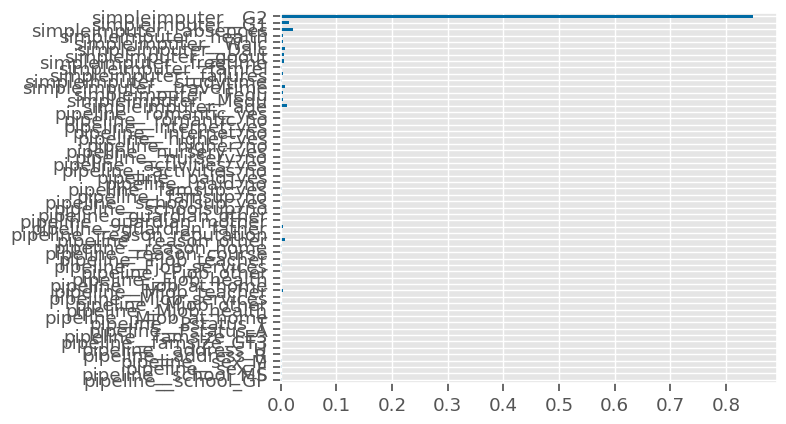

In [28]:
# plot importance
ax = importances.plot(kind = 'barh')

Issues with above visualization:
- Cannot read the feature names on the tick labels.
- Only a handful of features have visible bars.
- The bars that have similar importances are difficult to compare visually (which one is more important??)
- The dimensions of the graph are not optimal.
- And of course, we have no axis labels or title.

In [31]:
## Saving the feature importances sorted from largest to smallest (ascending=False)
sorted_importances = importances.sort_values(ascending=True)
sorted_importances

pipeline__Pstatus_T            0.000219
pipeline__paid_no              0.000229
pipeline__higher_no            0.000254
pipeline__Fjob_teacher         0.000302
pipeline__Pstatus_A            0.000371
pipeline__Mjob_health          0.000421
pipeline__internet_yes         0.000477
pipeline__paid_yes             0.000493
pipeline__famsize_LE3          0.000523
pipeline__internet_no          0.000556
pipeline__activities_yes       0.000558
pipeline__Fjob_health          0.000619
pipeline__Fjob_at_home         0.000619
pipeline__higher_yes           0.000651
pipeline__romantic_no          0.000675
pipeline__Mjob_at_home         0.000687
pipeline__activities_no        0.000703
pipeline__romantic_yes         0.000736
pipeline__guardian_other       0.000740
pipeline__Mjob_services        0.000774
pipeline__address_U            0.000873
pipeline__guardian_mother      0.000954
pipeline__reason_reputation    0.001019
pipeline__nursery_no           0.001058
pipeline__nursery_yes          0.001062


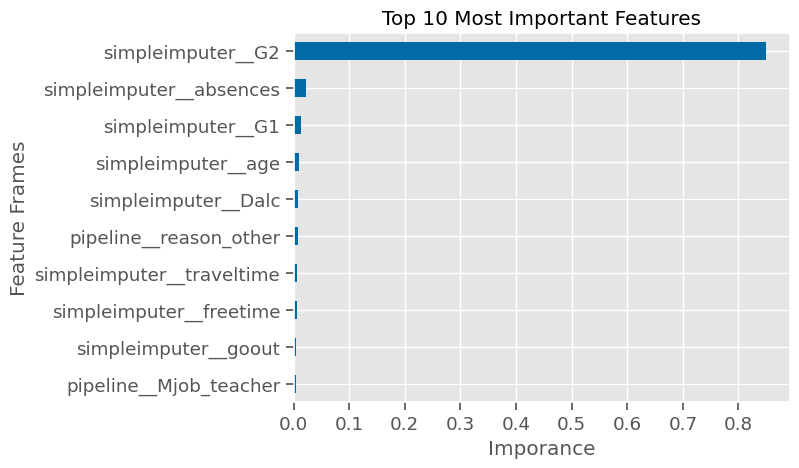

In [34]:
## just keep the top 10 importances and plot
ax= sorted_importances.tail(10).plot(kind = 'barh')
ax.set(xlabel = 'Imporance', ylabel = 'Feature Frames', title='Top 10 Most Important Features');

In [35]:
## using the ax to get the fig
fig_ax = ax.get_figure()

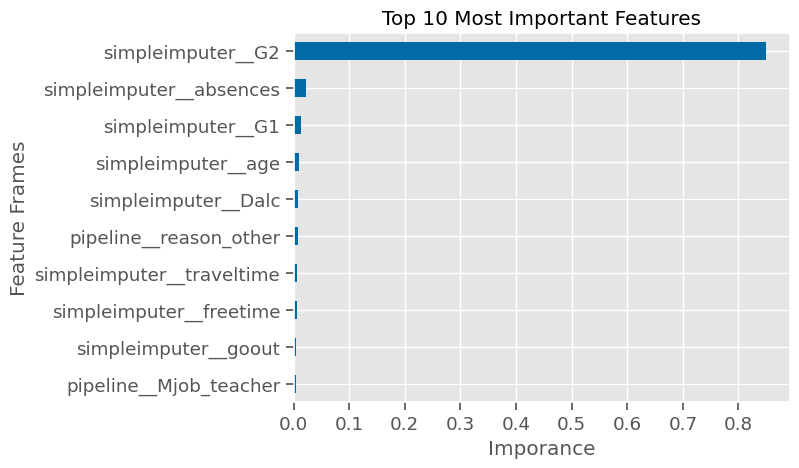

In [36]:
fig_ax

In [37]:
## extracting feature names from the model
reg.feature_names_in_

array(['pipeline__school_GP', 'pipeline__school_MS', 'pipeline__sex_F',
       'pipeline__sex_M', 'pipeline__address_R', 'pipeline__address_U',
       'pipeline__famsize_GT3', 'pipeline__famsize_LE3',
       'pipeline__Pstatus_A', 'pipeline__Pstatus_T',
       'pipeline__Mjob_at_home', 'pipeline__Mjob_health',
       'pipeline__Mjob_other', 'pipeline__Mjob_services',
       'pipeline__Mjob_teacher', 'pipeline__Fjob_at_home',
       'pipeline__Fjob_health', 'pipeline__Fjob_other',
       'pipeline__Fjob_services', 'pipeline__Fjob_teacher',
       'pipeline__reason_course', 'pipeline__reason_home',
       'pipeline__reason_other', 'pipeline__reason_reputation',
       'pipeline__guardian_father', 'pipeline__guardian_mother',
       'pipeline__guardian_other', 'pipeline__schoolsup_no',
       'pipeline__schoolsup_yes', 'pipeline__famsup_no',
       'pipeline__famsup_yes', 'pipeline__paid_no', 'pipeline__paid_yes',
       'pipeline__activities_no', 'pipeline__activities_yes',
       'pipel

In [38]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [39]:
importances = get_importances(reg, sort=True, ascending=False)

In [40]:
importances

simpleimputer__G2              0.849232
simpleimputer__absences        0.021766
simpleimputer__G1              0.014094
simpleimputer__age             0.010327
simpleimputer__Dalc            0.007245
pipeline__reason_other         0.007218
simpleimputer__traveltime      0.006748
simpleimputer__freetime        0.006341
simpleimputer__goout           0.005383
pipeline__Mjob_teacher         0.004647
simpleimputer__Medu            0.004538
simpleimputer__health          0.004171
simpleimputer__failures        0.003554
simpleimputer__Walc            0.003323
pipeline__guardian_father      0.003260
simpleimputer__Fedu            0.003213
simpleimputer__famrel          0.002910
pipeline__famsup_no            0.002841
simpleimputer__studytime       0.002227
pipeline__Fjob_other           0.002072
pipeline__famsup_yes           0.002020
pipeline__Fjob_services        0.001883
pipeline__sex_F                0.001807
pipeline__reason_home          0.001642
pipeline__school_MS            0.001640


In [41]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

<AxesSubplot: title={'center': 'All Features - Ranked by Importance'}, xlabel='Importance', ylabel='Feature Names'>

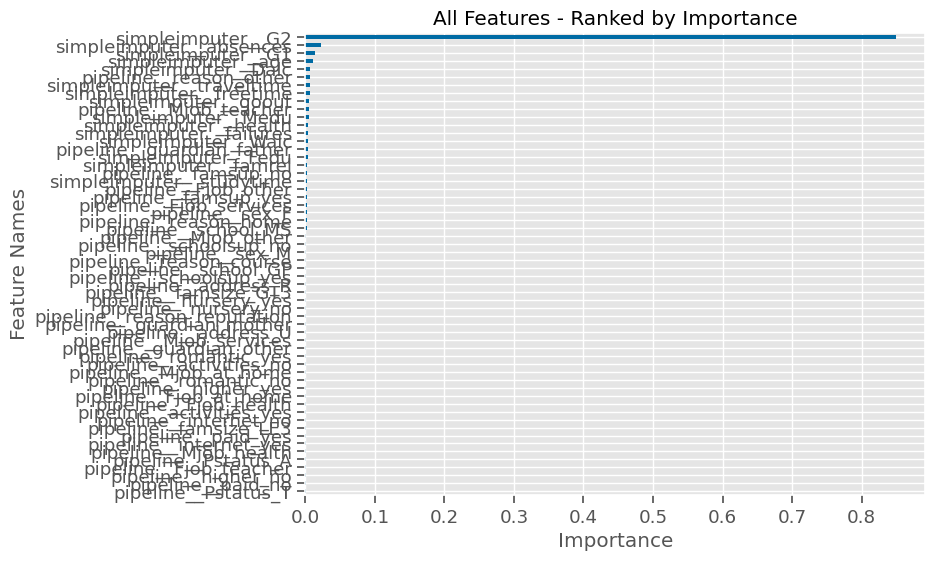

In [42]:
plot_importance(importances)

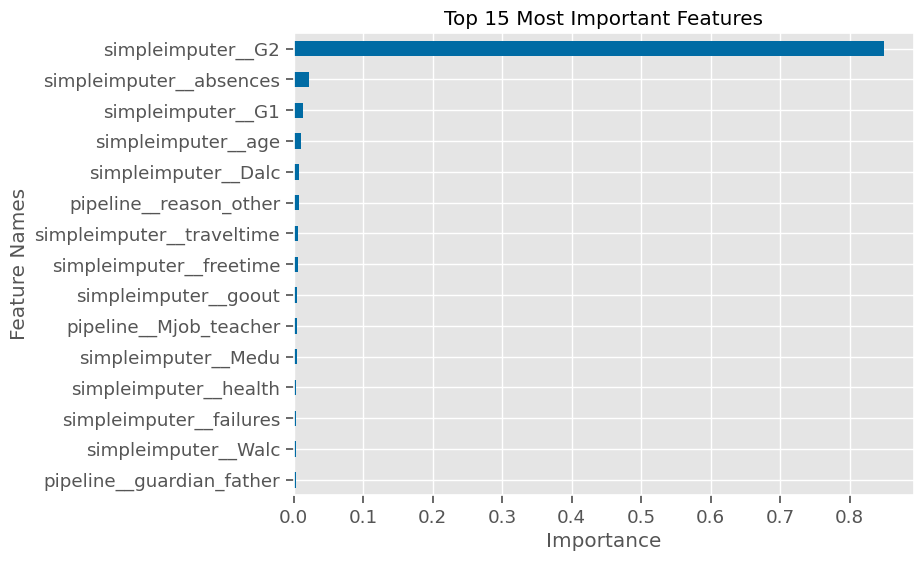

In [43]:
## testing our function
importances = get_importances(reg,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=15);

## Remaking Our Model - Using Our Functions

Training Data:	R^2= 0.98	RMSE= 0.51
Test Data:	R^2= 0.82	RMSE= 1.27


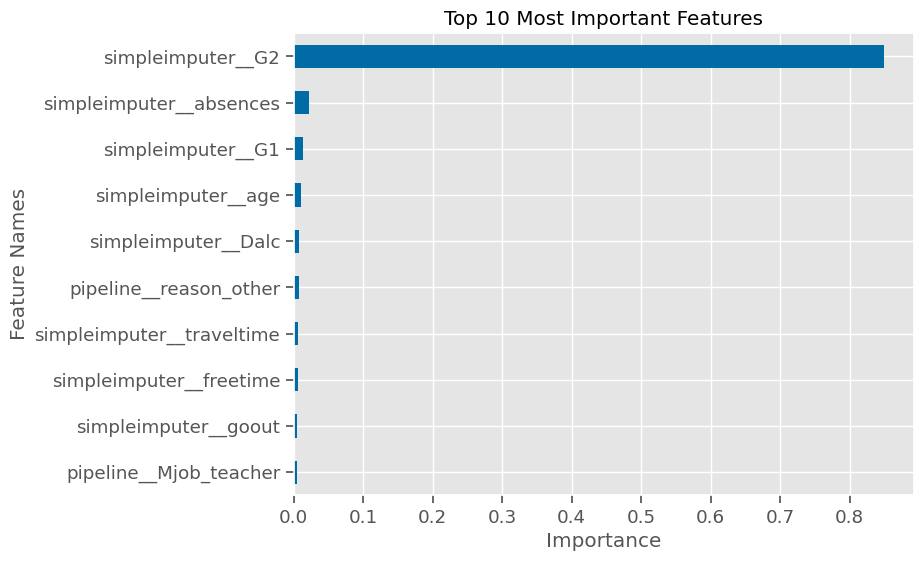

In [44]:
## fit random forest
reg = RandomForestRegressor()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=10);

## Exploring the Most Important Features

In [45]:
importances.sort_values(ascending=False).head(4)

simpleimputer__G2          0.849232
simpleimputer__absences    0.021766
simpleimputer__G1          0.014094
simpleimputer__age         0.010327
Name: Feature Importance, dtype: float64

In [46]:
plot_train = pd.concat([X_train_df,y_train],axis=1)
plot_test = pd.concat([X_test_df,y_test],axis=1)
plot_df = pd.concat([plot_train, plot_test])
plot_df

,pipeline__school_GP,pipeline__school_MS,pipeline__sex_F,pipeline__sex_M,pipeline__address_R,pipeline__address_U,pipeline__famsize_GT3,pipeline__famsize_LE3,pipeline__Pstatus_A,pipeline__Pstatus_T,pipeline__Mjob_at_home,pipeline__Mjob_health,pipeline__Mjob_other,pipeline__Mjob_services,pipeline__Mjob_teacher,pipeline__Fjob_at_home,pipeline__Fjob_health,pipeline__Fjob_other,pipeline__Fjob_services,pipeline__Fjob_teacher,pipeline__reason_course,pipeline__reason_home,pipeline__reason_other,pipeline__reason_reputation,pipeline__guardian_father,...,pipeline__activities_yes,pipeline__nursery_no,pipeline__nursery_yes,pipeline__higher_no,pipeline__higher_yes,pipeline__internet_no,pipeline__internet_yes,pipeline__romantic_no,pipeline__romantic_yes,simpleimputer__age,simpleimputer__Medu,simpleimputer__Fedu,simpleimputer__traveltime,simpleimputer__studytime,simpleimputer__failures,simpleimputer__famrel,simpleimputer__freetime,simpleimputer__goout,simpleimputer__Dalc,simpleimputer__Walc,simpleimputer__health,simpleimputer__absences,simpleimputer__G1,simpleimputer__G2,G3
54,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,3.0,3.0,1.0,1.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,0.0,13.0,12.0,13
208,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,3.0,2.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,0.0,13.0,12.0,12
23,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,2.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,4.0,5.0,2.0,10.0,10.0,10
547,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,4.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,1.0,2.0,0.0,10.0,11.0,11
604,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,18.0,1.0,1.0,3.0,2.0,1.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,9.0,10.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,17.0,1.0,1.0,1.0,3.0,0.0,4.0,3.0,3.0,1.0,1.0,3.0,0.0,13.0,13.0,14
454,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,16.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,4.0,3.0,9.0,8.0,8
56,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,4.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,15.0,14.0,15
203,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,17.0,1.0,2.0,1.0,2.0,0.0,3.0,1.0,3.0,1.0,5.0,3.0,6.0,9.0,9.0,10


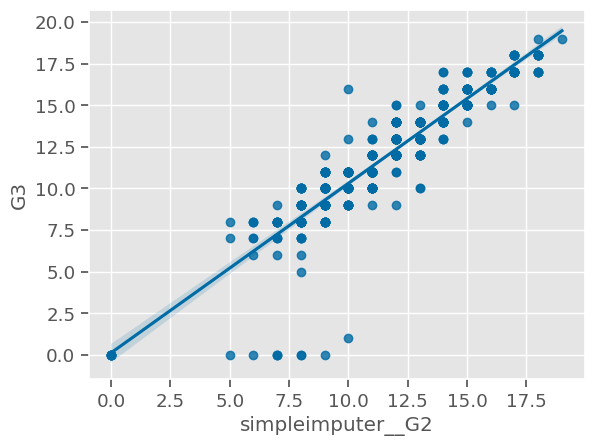

In [50]:
sns.regplot(data=plot_df, x='simpleimputer__G2',y='G3');

We can see a very clear pattern between G2 and G3. Except for a few 0's, all of the other values show a very strong correlation between G2 and G3, which makes sense.

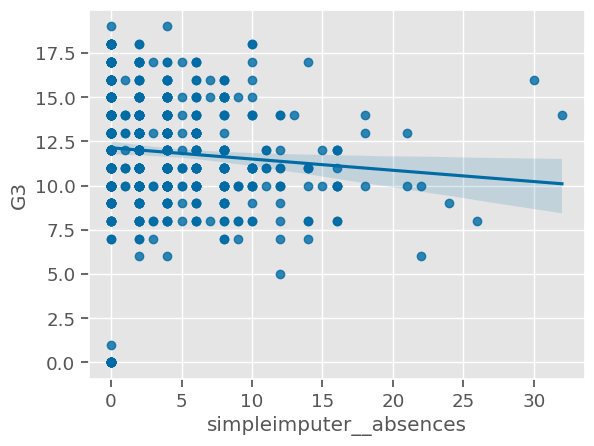

In [51]:
sns.regplot(data=plot_df, x='simpleimputer__absences',y='G3');

- Absences seem to have a relatively flat relationship when we view a linear regression line summarizing the relationship.
- Instead of a normal linear regression, we can apply a Lowess regression (Locally Weighted Smoothed Scatterplot). This provides us with a nonlinear curve summarizing the relationship over the length of the entire x-axis.

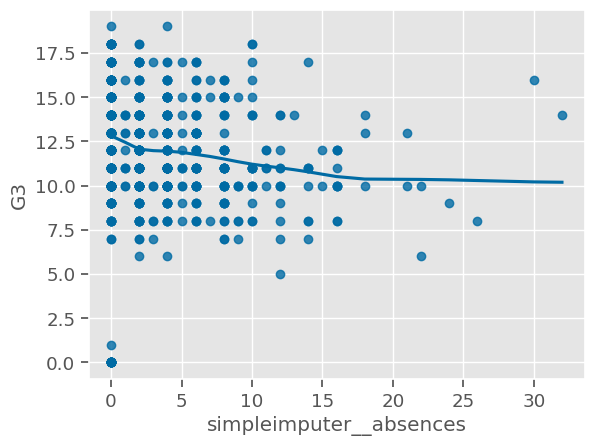

In [52]:
sns.regplot(data=plot_df, x='simpleimputer__absences',y='G3', lowess=True);

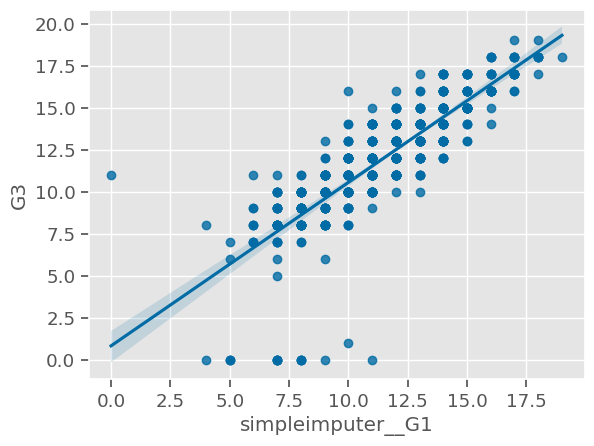

In [53]:
sns.regplot(data=plot_df, x='simpleimputer__G1',y='G3');

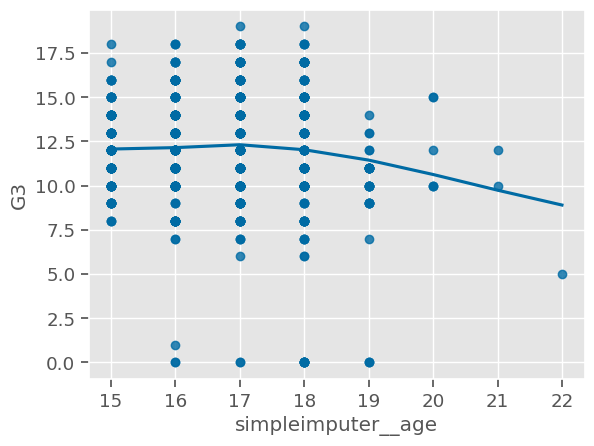

In [55]:
sns.regplot(data=plot_df, x='simpleimputer__age',y='G3', lowess = True);

- It looks like the lowess scatterplot is showing us the same thing as our linear scatterplot:
    - A minor downward trend as age increases.
- If we treat the ages as groups and visualize the average grade for each age, we may be able to see the pattern more clearly.

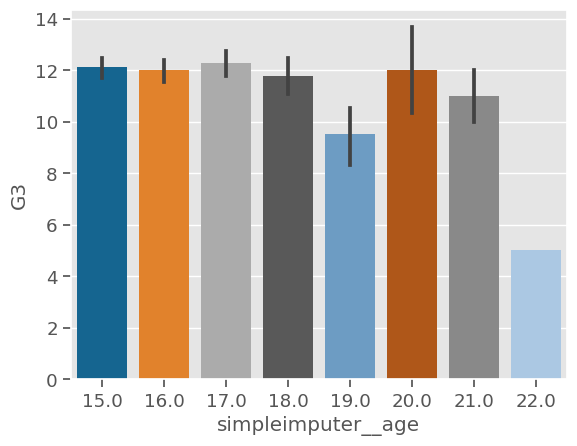

In [56]:
sns.barplot(data=plot_df, x='simpleimputer__age',y='G3');

- It looks like there is a general pattern of older students performing worse in their 3rd period.
- This makes sense, as someone who is 19 years old may have been held back previously or had some developmental issues that caused them to start school at an older age.
    - We don't really know, though! At least not with the tools we have applied thus far.

Now we create a swarmplot on top of our bar plot. A swarmplot is a scatterplot that separates the points so they do not overlap and each point can be seen. This is an advanced technique to provide us with a more detailed visualization.

<AxesSubplot: xlabel='simpleimputer__age', ylabel='G3'>

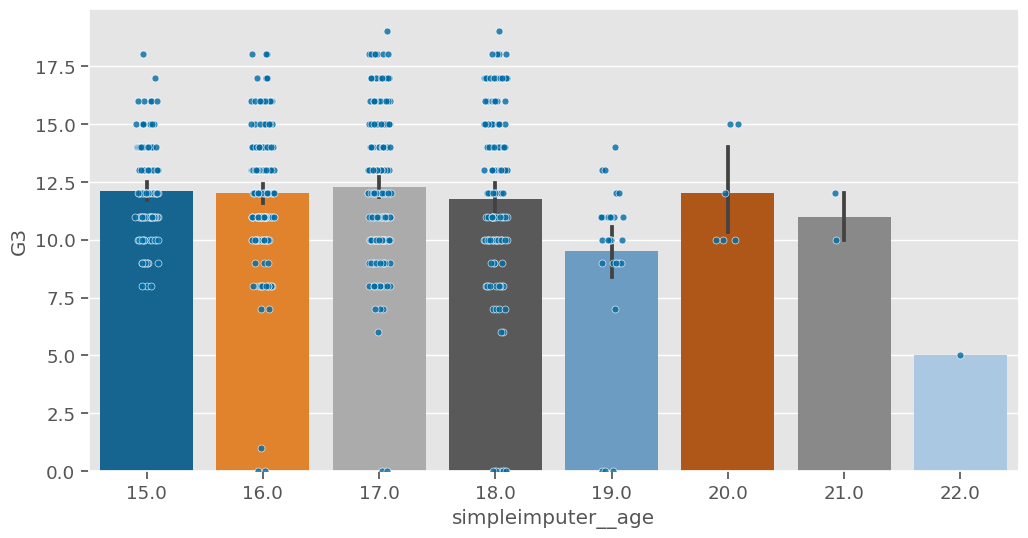

In [61]:
## adding a swarmplot to visualize each point
plt.figure(figsize=(12,6))
sns.stripplot(data=plot_df, x='simpleimputer__age',y='G3',size=5,edgecolor='white',
              linewidth=0.5, alpha=.8);
sns.barplot(data=plot_df, x='simpleimputer__age',y='G3')#,palette='dark');

As you can see, adding the swarmplot provides more detail in understanding how age is related to the G3 score.

## Task B: Modeling Without Previous Grades
We have also discussed different approaches we could take with this business problem. Our stakeholders do not want to wait until it is "too late" to start interventions with at-risk students. They want to make identify the potential at-risk students BEFORE G1 and G2 grades are earned. To address this, we will remove the G1 and G2 features in our next model to try to predict student grades for period 3 without knowing their prior grades.

In [64]:
## Drop the G1 and G2 features from the x vars
drop_cols = ['simpleimputer__G1','simpleimputer__G2']
X_train_B = X_train_df.drop(columns=drop_cols)
X_test_B = X_test_df.drop(columns=drop_cols)
feature_names_B = X_train_B.columns
X_train_B.head(3)

,pipeline__school_GP,pipeline__school_MS,pipeline__sex_F,pipeline__sex_M,pipeline__address_R,pipeline__address_U,pipeline__famsize_GT3,pipeline__famsize_LE3,pipeline__Pstatus_A,pipeline__Pstatus_T,pipeline__Mjob_at_home,pipeline__Mjob_health,pipeline__Mjob_other,pipeline__Mjob_services,pipeline__Mjob_teacher,pipeline__Fjob_at_home,pipeline__Fjob_health,pipeline__Fjob_other,pipeline__Fjob_services,pipeline__Fjob_teacher,pipeline__reason_course,pipeline__reason_home,pipeline__reason_other,pipeline__reason_reputation,pipeline__guardian_father,...,pipeline__paid_no,pipeline__paid_yes,pipeline__activities_no,pipeline__activities_yes,pipeline__nursery_no,pipeline__nursery_yes,pipeline__higher_no,pipeline__higher_yes,pipeline__internet_no,pipeline__internet_yes,pipeline__romantic_no,pipeline__romantic_yes,simpleimputer__age,simpleimputer__Medu,simpleimputer__Fedu,simpleimputer__traveltime,simpleimputer__studytime,simpleimputer__failures,simpleimputer__famrel,simpleimputer__freetime,simpleimputer__goout,simpleimputer__Dalc,simpleimputer__Walc,simpleimputer__health,simpleimputer__absences
54,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,3.0,3.0,1.0,1.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,0.0
208,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,3.0,2.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,0.0
23,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,2.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,4.0,5.0,2.0


Training Data:	R^2= 0.89	RMSE= 1.07
Test Data:	R^2= 0.37	RMSE= 2.40


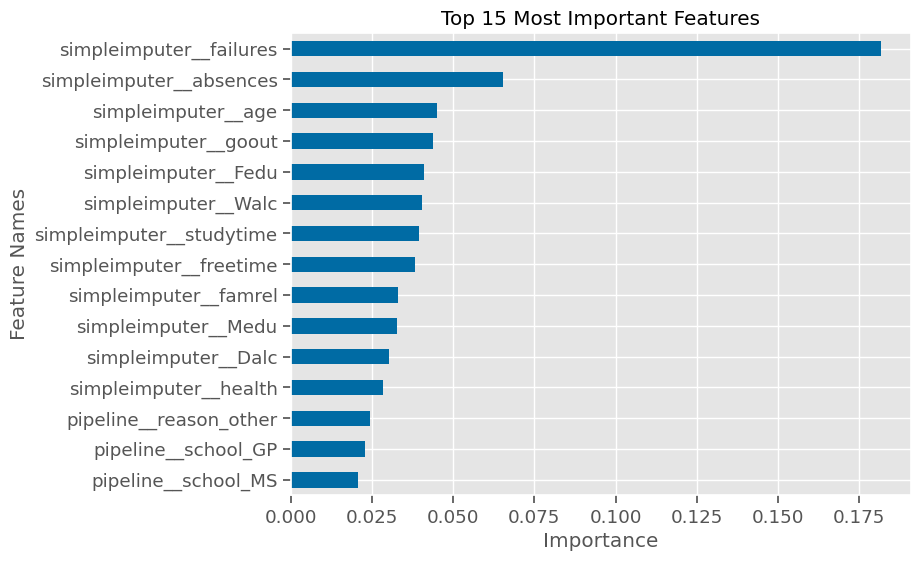

In [65]:
reg_B = RandomForestRegressor(random_state = SEED)
reg_B.fit(X_train_B, y_train)
evaluate_regression(reg_B, X_train_B, y_train, X_test_B,y_test)
## Saving the feature importances
importances = get_importances(reg_B, sort=True, ascending=False)
plot_importance(importances, top_n=15);

Now that we have removed G2 and G1, we see a couple of significant changes in our results:
- Our model's performance has decreased dramatically without those features. Our testing R-squared plummeted from .71 to .35
- Many more features are showing visible degrees of importance than before.

# Permutation Importance

The function will take our model and our features and it will repeat the modeling for each feature.
- One at a time, for each feature, it will shuffle all of the rows JUST IN THAT ONE FEATURE and repeat the modeling process.
- The idea is that we are scrambling/destroying that feature's relationship to our target.

In [66]:
## Permutation importance takes a fit model and the test data.
r = permutation_importance(reg_B, X_test_B, y_test, n_repeats=5)

In [67]:
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [70]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'], index = X_test_B.columns, 
                                  name = 'Permutation Importance')
permutation_importances

pipeline__school_GP           -0.018401
pipeline__school_MS           -0.008098
pipeline__sex_F                0.007065
pipeline__sex_M                0.006350
pipeline__address_R            0.004490
pipeline__address_U            0.003210
pipeline__famsize_GT3         -0.002331
pipeline__famsize_LE3         -0.003553
pipeline__Pstatus_A            0.002165
pipeline__Pstatus_T            0.000457
pipeline__Mjob_at_home        -0.004376
pipeline__Mjob_health          0.002597
pipeline__Mjob_other          -0.001915
pipeline__Mjob_services       -0.000004
pipeline__Mjob_teacher         0.002016
pipeline__Fjob_at_home        -0.007814
pipeline__Fjob_health         -0.000542
pipeline__Fjob_other          -0.001946
pipeline__Fjob_services        0.000881
pipeline__Fjob_teacher        -0.002610
pipeline__reason_course        0.000982
pipeline__reason_home         -0.001059
pipeline__reason_other         0.007475
pipeline__reason_reputation   -0.004669
pipeline__guardian_father      0.001432


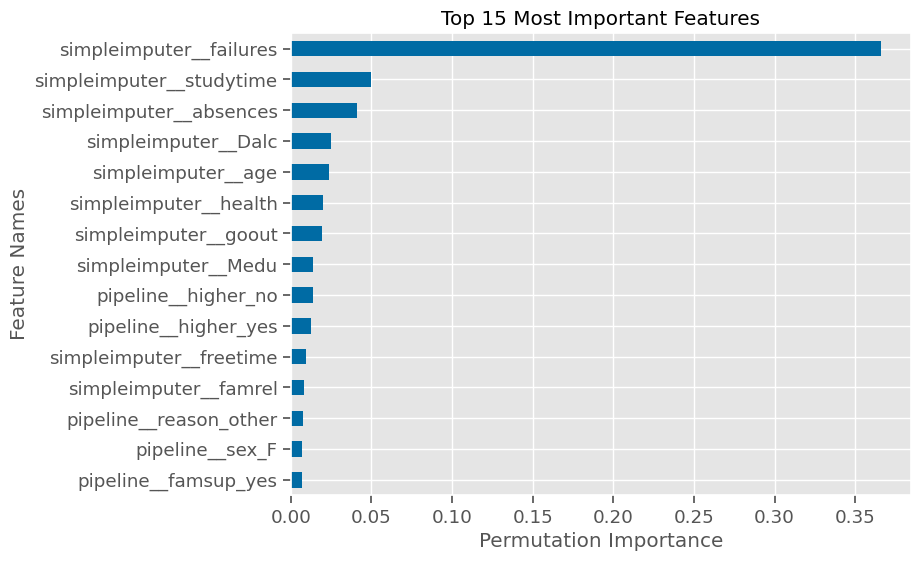

In [71]:
ax = plot_importance(permutation_importances,top_n=15)
ax.set(xlabel='Permutation Importance');

In [72]:
## color -coding top 5 bars
highlight_feats = importances.sort_values(ascending=True).tail(5).index
highlight_feats

Index(['simpleimputer__Fedu', 'simpleimputer__goout', 'simpleimputer__age',
       'simpleimputer__absences', 'simpleimputer__failures'],
      dtype='object')

Next, we will create a dictionary by looping through the importances' index, and for each feature, we will add the feature name as the key. The value will be:
green if the feature is in our highlight_feats list (Our type 5 features from the built-in feature importances we extracted in the previous lesson).
otherwise blue. (see Note below).

In [73]:
## create a dictionary of each feature and its color
colors_dict = {}
for col in importances.index:
    if col in highlight_feats:
        colors_dict[col] = 'green'
    else:
        colors_dict[col] = 'blue'

colors_dict

{'simpleimputer__failures': 'green',
 'simpleimputer__absences': 'green',
 'simpleimputer__age': 'green',
 'simpleimputer__goout': 'green',
 'simpleimputer__Fedu': 'green',
 'simpleimputer__Walc': 'blue',
 'simpleimputer__studytime': 'blue',
 'simpleimputer__freetime': 'blue',
 'simpleimputer__famrel': 'blue',
 'simpleimputer__Medu': 'blue',
 'simpleimputer__Dalc': 'blue',
 'simpleimputer__health': 'blue',
 'pipeline__reason_other': 'blue',
 'pipeline__school_GP': 'blue',
 'pipeline__school_MS': 'blue',
 'simpleimputer__traveltime': 'blue',
 'pipeline__higher_no': 'blue',
 'pipeline__Mjob_teacher': 'blue',
 'pipeline__reason_home': 'blue',
 'pipeline__Fjob_teacher': 'blue',
 'pipeline__schoolsup_yes': 'blue',
 'pipeline__higher_yes': 'blue',
 'pipeline__reason_reputation': 'blue',
 'pipeline__schoolsup_no': 'blue',
 'pipeline__Fjob_services': 'blue',
 'pipeline__Mjob_other': 'blue',
 'pipeline__famsup_no': 'blue',
 'pipeline__Mjob_at_home': 'blue',
 'pipeline__famsup_yes': 'blue',
 'pi

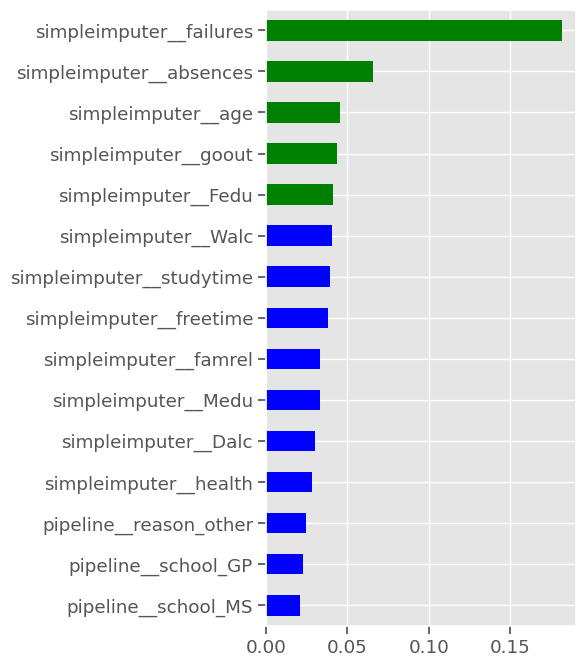

In [74]:
plot_vals = importances.sort_values().tail(15)
plot_vals.plot(kind='barh',color=plot_vals.index.map(colors_dict), figsize=(4,8));

In [75]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [76]:
colors_top7 = get_color_dict(importances, top_n=7)
colors_top7

{'simpleimputer__failures': 'green',
 'simpleimputer__absences': 'green',
 'simpleimputer__age': 'green',
 'simpleimputer__goout': 'green',
 'simpleimputer__Fedu': 'green',
 'simpleimputer__Walc': 'green',
 'simpleimputer__studytime': 'green',
 'simpleimputer__freetime': '#006ba4',
 'simpleimputer__famrel': '#006ba4',
 'simpleimputer__Medu': '#006ba4',
 'simpleimputer__Dalc': '#006ba4',
 'simpleimputer__health': '#006ba4',
 'pipeline__reason_other': '#006ba4',
 'pipeline__school_GP': '#006ba4',
 'pipeline__school_MS': '#006ba4',
 'simpleimputer__traveltime': '#006ba4',
 'pipeline__higher_no': '#006ba4',
 'pipeline__Mjob_teacher': '#006ba4',
 'pipeline__reason_home': '#006ba4',
 'pipeline__Fjob_teacher': '#006ba4',
 'pipeline__schoolsup_yes': '#006ba4',
 'pipeline__higher_yes': '#006ba4',
 'pipeline__reason_reputation': '#006ba4',
 'pipeline__schoolsup_no': '#006ba4',
 'pipeline__Fjob_services': '#006ba4',
 'pipeline__Mjob_other': '#006ba4',
 'pipeline__famsup_no': '#006ba4',
 'pipeline

In [77]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

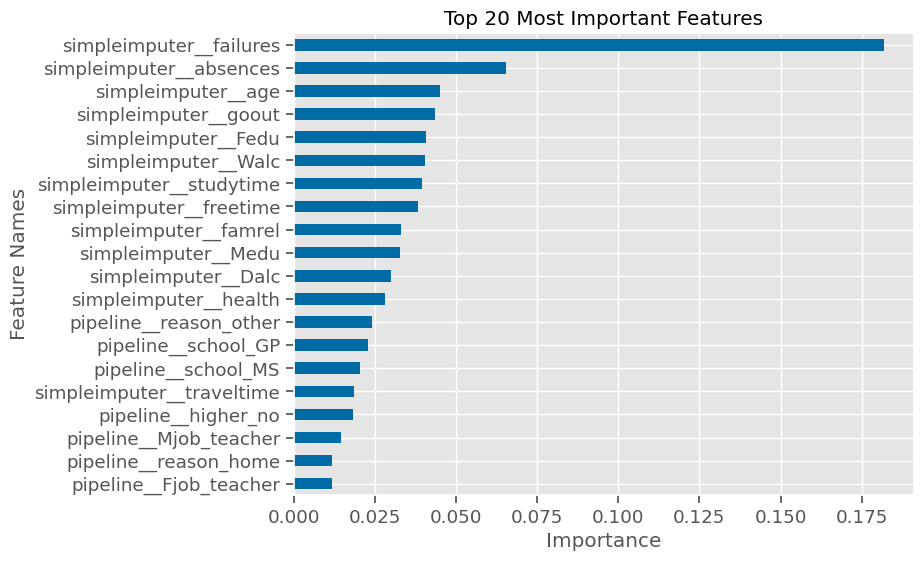

In [78]:
plot_importance_color(importances, color_dict=None,top_n=20);

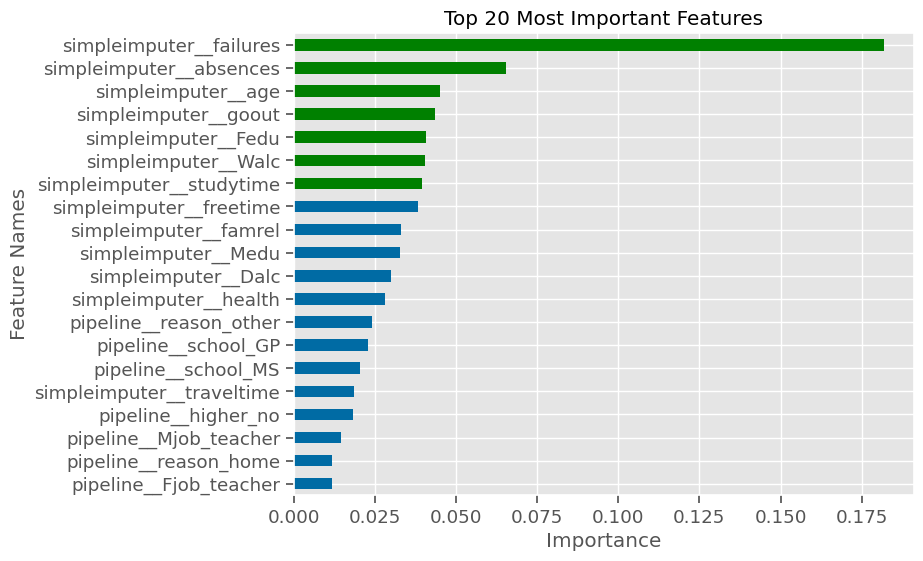

In [79]:
plot_importance_color(importances, color_dict=colors_top7,top_n=20);

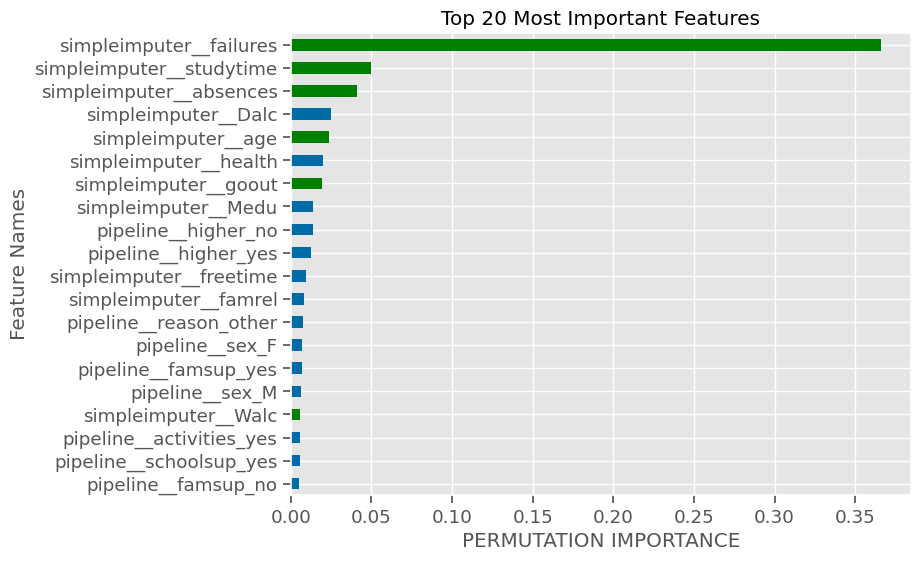

In [80]:
ax = plot_importance_color(permutation_importances,color_dict=colors_top7,top_n=20);
ax.set_xlabel("PERMUTATION IMPORTANCE");

In [81]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None, ax=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

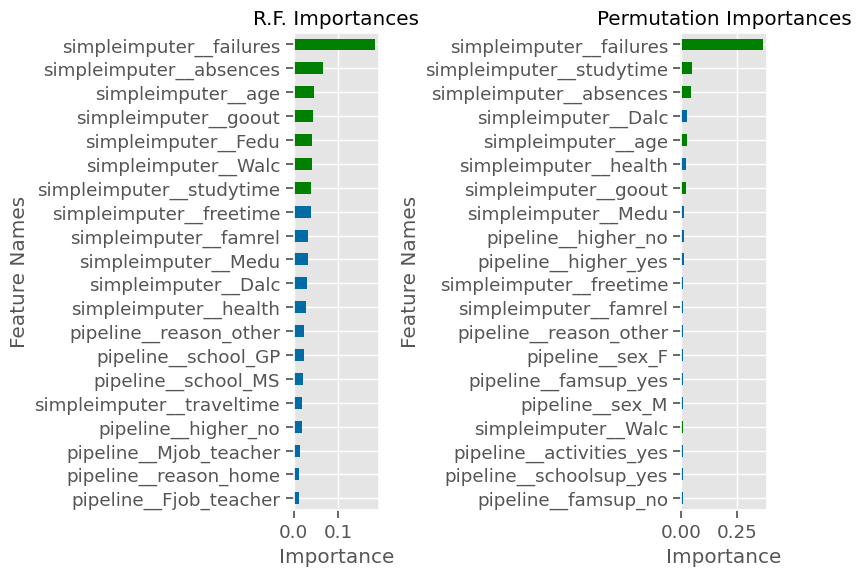

In [82]:
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
n = 20 # setting the # of features to use for both subplots
plot_importance_color_ax(importances, top_n=n, ax=axes[0],
                         color_dict= colors_top7)
plot_importance_color_ax(permutation_importances, top_n=n, ax=axes[1],
                         color_dict=colors_top7)
axes[0].set(title='R.F. Importances')
axes[1].set(title='Permutation Importances')
fig.tight_layout()